In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()  # Upload your "archive (1).zip"

Saving archive (1).zip to archive (1).zip


In [4]:
import zipfile
import os

In [5]:
zip_file_name = "archive (1).zip"
extract_path = "/content/Felidae_dataset"

In [6]:
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Extracted to: {extract_path}")

✅ Extracted to: /content/Felidae_dataset


In [7]:
folders = os.listdir(extract_path)
print("Found folders:")
for folder in folders:
    print("-", folder)

Found folders:
- Felidae


In [8]:
data_dir = "Felidae_dataset/Felidae"


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 32

# Define training data generator with 20% validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Get the class labels
class_labels = list(train_generator.class_indices.keys())
print("✅ Class labels:", class_labels)

Found 196 images belonging to 5 classes.
Found 47 images belonging to 5 classes.
✅ Class labels: ['Cheetah', 'Leopard', 'Lion', 'Puma', 'Tiger']


In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 without top layers
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

# Freeze base model layers
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(class_labels), activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [12]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.1963 - loss: 2.4256 - val_accuracy: 0.2128 - val_loss: 1.7243
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.2176 - loss: 1.9701 - val_accuracy: 0.4043 - val_loss: 1.5074
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.3334 - loss: 1.6688 - val_accuracy: 0.4894 - val_loss: 1.3442
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.3574 - loss: 1.4753 - val_accuracy: 0.6596 - val_loss: 1.2045
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4152 - loss: 1.3266 - val_accuracy: 0.7660 - val_loss: 1.0887
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5578 - loss: 1.1209 - val_accuracy: 0.8085 - val_loss: 0.9864
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6288 - loss: 1.0714 - val_accuracy: 0.8298 - val_loss: 0.8909
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7049 - loss: 0.8995 - val_accuracy: 0.8936 - val_loss: 0.8042
Epoch 9/

In [13]:
model.save("Tiger_classifier.keras")


In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    print("✅ Predicted:", predicted_class)
    return predicted_class

Saving cheetah.jpg to cheetah.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


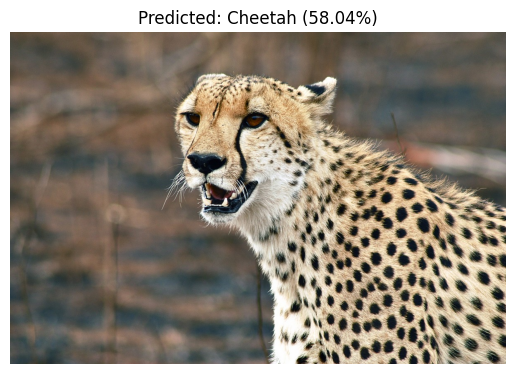

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Step 1: Upload image
uploaded = files.upload()

# Step 2: Process and predict each image
for img_name in uploaded.keys():
    # Load and preprocess image
    img_path = img_name
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize like training

    # Predict
    prediction = model.predict(img_array)[0]  # Get the prediction vector

    # Get predicted index and confidence
    predicted_index = np.argmax(prediction)
    confidence = prediction[predicted_index]

    # Set threshold
    threshold = 0.35

    # Check if prediction is confident enough
    if confidence < threshold:
        predicted_class = "Invalid image(Please provide image from tiger family)"
        title = f"{predicted_class} ({confidence*100:.2f}%)"
    else:
        predicted_class = class_labels[predicted_index]
        title = f"Predicted: {predicted_class} ({confidence*100:.2f}%)"

    # Display result

    plt.imshow(Image.open(img_path))
    plt.title(title)
    plt.axis('off')
    plt.show()


In [16]:
import os
print(os.getcwd())

/content


In [17]:
os.listdir()

['.config',
 'Felidae_dataset',
 'cheetah.jpg',
 'archive (1).zip',
 'Tiger_classifier.keras',
 'sample_data']

In [18]:
files.download("Tiger_classifier.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
model.save("Tiger_classifier.h5")

In [20]:
files.download("Tiger_classifier.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>